In [1]:
import pandas as pd, numpy as np, duckdb, matplotlib.pyplot as plt

In [3]:
%pip install duckdb


   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.3 MB 1.1 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/12.3 MB 1.3 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/12.3 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.3 MB 1.1 MB/s eta 0:00:11
   ----- ---------------------------------- 1.6/12.3 MB 1.0 MB/s eta 0:00:11
   ----- ---------------------------------- 1.8/12.3 MB 1.1 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.3 MB 1.1 MB/s eta 0:00:10
   ------- -------------------------------- 2.4/12.3 MB 1.1 MB/s eta 0:00:10
   -------- ------------------------------- 2.6/12.3 MB 1.1 MB/s eta 0:00:09
   -------- ---------------

In [2]:
import duckdb; duckdb.__version__

'1.4.0'

In [3]:
data = pd.read_excel("online_retail_II.xlsx")

In [5]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [6]:
data[data.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [7]:
data.dropna(subset="Customer ID",inplace=True)

In [8]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [9]:
data.drop(data[data["Quantity"]<=0].index,inplace=True)

In [10]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [11]:
data=data[data["Price"]>0]

In [12]:
data[data["Description"].fillna("test",inplace=True) == "test"]

C:\Users\tarik\AppData\Local\Temp\ipykernel_19164\3190832913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[data["Description"].fillna("test",inplace=True) == "test"]
C:\Users\tarik\AppData\Local\Temp\ipykernel_19164\3190832913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data["Description"].fillna("test",inplace=True) ==

KeyError: False

In [13]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [14]:
data["amount"]=data["Quantity"]*data["Price"]


C:\Users\tarik\AppData\Local\Temp\ipykernel_19164\874169353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["amount"]=data["Quantity"]*data["Price"]


In [15]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [16]:
data.rename(columns={"Customer ID":"Customer_id"},inplace=True)

C:\Users\tarik\AppData\Local\Temp\ipykernel_19164\745045264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"Customer ID":"Customer_id"},inplace=True)


In [17]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_id,Country,amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [18]:
data = data.rename(columns={
    "Invoice": "InvoiceNo",
    "StockCode": "StockCode",
    "Description": "Description",
    "Quantity": "Quantity",
    "InvoiceDate": "InvoiceDate",
    "Price": "UnitPrice",
    "Customer ID": "CustomerID",
    "Country": "Country",
    "amount": "Amount",   
})

In [19]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Customer_id,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [20]:
print("Önce:", list(data.columns))

Önce: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Customer_id', 'Country', 'Amount']


In [21]:
data.rename(columns={"Customer_id":"CustomerID"},inplace=True)

In [22]:
con = duckdb.connect()         
con.register("data", data)


q_base = """
WITH orders AS (
  SELECT
    CAST(CustomerID AS BIGINT) AS user_id,
    CAST(date_trunc('month', InvoiceDate) AS DATE) AS order_month,
    SUM(Amount) AS amount
  FROM data
  GROUP BY 1,2
),
first_orders AS (
  SELECT user_id, MIN(order_month) AS cohort_month
  FROM orders
  GROUP BY 1
),
labeled AS (
  SELECT
    o.user_id,
    f.cohort_month,
    o.order_month,
    (EXTRACT(YEAR FROM o.order_month)-EXTRACT(YEAR FROM f.cohort_month))*12 +
    (EXTRACT(MONTH FROM o.order_month)-EXTRACT(MONTH FROM f.cohort_month)) AS month_index,
    o.amount
  FROM orders o
  JOIN first_orders f USING(user_id)
)
"""
retention = con.execute(
    q_base + """
    SELECT
      cohort_month,
      month_index,
      COUNT(DISTINCT user_id) AS active_users
    FROM labeled
    GROUP BY 1,2
    ORDER BY 1,2
    """
).df()

In [23]:
print("data.shape:", data.shape)
print("Kolonlar:", list(data.columns))
print("İlk 3 satır:")
display(data.head(3))

data.shape: (407664, 9)
Kolonlar: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Amount']
İlk 3 satır:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [24]:
from IPython.display import display

print("retention değişkeni var mı?", "retention" in globals())
if "retention" in globals():
    print("retention.shape:", retention.shape)
    display(retention.head(10))
else:
    print("retention henüz oluşturulmamış. Bir önceki sorgu hücresini çalıştır.")

retention değişkeni var mı? True
retention.shape: (91, 3)


,cohort_month,month_index,active_users
0,2009-12-01,0,955
1,2009-12-01,1,337
2,2009-12-01,2,319
3,2009-12-01,3,406
4,2009-12-01,4,363
5,2009-12-01,5,343
6,2009-12-01,6,360
7,2009-12-01,7,327
8,2009-12-01,8,321
9,2009-12-01,9,346


cohort_sizes.shape: (13, 2)


,cohort_month,cohort_size
0,2009-12-01,904
1,2010-01-01,345
2,2010-02-01,343
3,2010-03-01,412
4,2010-04-01,269
5,2010-05-01,234
6,2010-06-01,246
7,2010-07-01,163
8,2010-08-01,149
9,2010-09-01,220


matrix shape: (13, 13)


month_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2009-12-01,1.056416,0.372788,0.352876,0.449115,0.401549,0.379425,0.398230,0.361726,0.355088,0.382743,0.445796,0.523230,0.262168
2010-01-01,1.110145,0.228986,0.344928,0.339130,0.292754,0.333333,0.286957,0.255072,0.310145,0.353623,0.336232,0.110145,0.000000
2010-02-01,1.090379,0.259475,0.244898,0.317784,0.268222,0.218659,0.209913,0.311953,0.276968,0.300292,0.078717,0.000000,0.000000
2010-03-01,1.075243,0.203883,0.247573,0.259709,0.250000,0.218447,0.264563,0.325243,0.296117,0.084951,0.000000,0.000000,0.000000
2010-04-01,1.092937,0.211896,0.211896,0.178439,0.200743,0.245353,0.301115,0.286245,0.074349,0.000000,0.000000,0.000000,0.000000


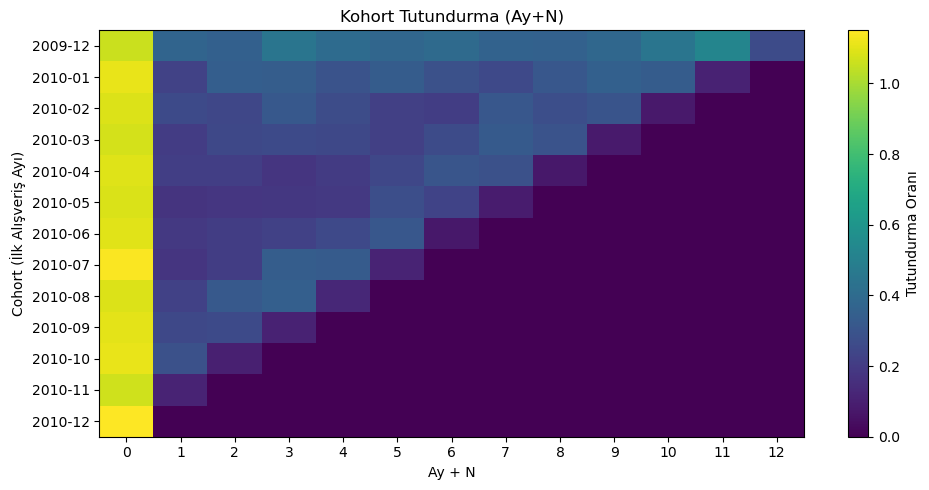

Kontrol — Ay+0 ortalama: 1.0975935911484789


In [27]:
cohort_sizes = con.execute("""
SELECT cohort_month, COUNT(*) AS cohort_size
FROM (
  SELECT CAST(CustomerID AS BIGINT) AS user_id,
         CAST(date_trunc('month', MIN(InvoiceDate)) AS DATE) AS cohort_month
  FROM data
  GROUP BY 1
) t
GROUP BY 1
ORDER BY 1
""").df()
print("cohort_sizes.shape:", cohort_sizes.shape)
display(cohort_sizes.head(10))


ret = retention.merge(cohort_sizes, on="cohort_month", how="left")
ret["retention"] = ret["active_users"] / ret["cohort_size"]
ret_12 = ret[ret["month_index"].between(0,12)]

mat = ret_12.pivot(index="cohort_month", columns="month_index", values="retention").fillna(0)
print("matrix shape:", mat.shape)
display(mat.head())

plt.figure(figsize=(10,5))
plt.imshow(mat, aspect="auto"); plt.colorbar(label="Tutundurma Oranı")
plt.title("Kohort Tutundurma (Ay+N)")
plt.xlabel("Ay + N"); plt.ylabel("Cohort (İlk Alışveriş Ayı)")
plt.xticks(range(mat.shape[1]), mat.columns)
plt.yticks(range(mat.shape[0]), pd.to_datetime(mat.index).strftime("%Y-%m"))
plt.tight_layout(); plt.show()

print("Kontrol — Ay+0 ortalama:", mat.get(0, pd.Series()).mean())

In [29]:
data_uk = data[data["Country"]=="United Kingdom"].copy()
con.unregister("data"); con.register("data", data_uk)



cohort_sizes.shape: (13, 2)


,cohort_month,cohort_size
0,2009-12-01,904
1,2010-01-01,345
2,2010-02-01,343
3,2010-03-01,412
4,2010-04-01,269
5,2010-05-01,234
6,2010-06-01,246
7,2010-07-01,163
8,2010-08-01,149
9,2010-09-01,220


matrix shape: (13, 13)


month_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
2009-12-01,1.056416,0.372788,0.352876,0.449115,0.401549,0.379425,0.398230,0.361726,0.355088,0.382743,0.445796,0.523230,0.262168
2010-01-01,1.110145,0.228986,0.344928,0.339130,0.292754,0.333333,0.286957,0.255072,0.310145,0.353623,0.336232,0.110145,0.000000
2010-02-01,1.090379,0.259475,0.244898,0.317784,0.268222,0.218659,0.209913,0.311953,0.276968,0.300292,0.078717,0.000000,0.000000
2010-03-01,1.075243,0.203883,0.247573,0.259709,0.250000,0.218447,0.264563,0.325243,0.296117,0.084951,0.000000,0.000000,0.000000
2010-04-01,1.092937,0.211896,0.211896,0.178439,0.200743,0.245353,0.301115,0.286245,0.074349,0.000000,0.000000,0.000000,0.000000


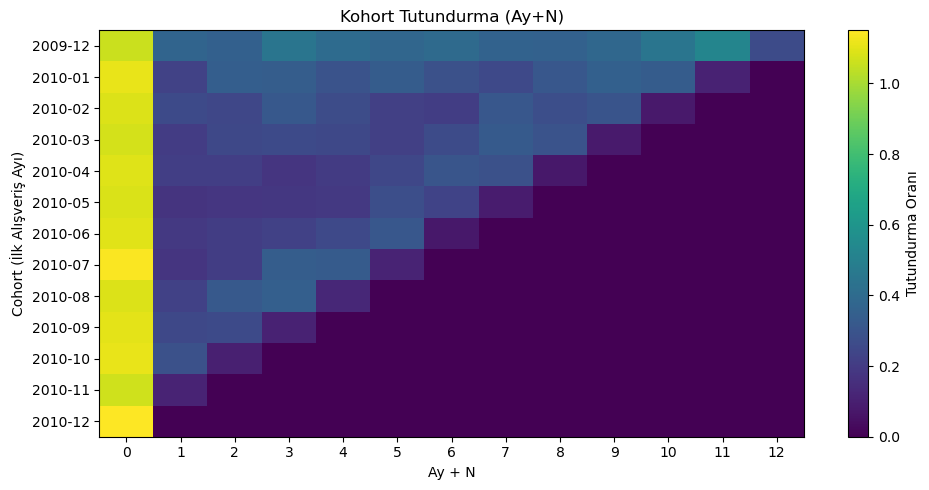

Kontrol — Ay+0 ortalama: 1.0975935911484789


In [30]:
cohort_sizes = con.execute("""
SELECT cohort_month, COUNT(*) AS cohort_size
FROM (
  SELECT CAST(CustomerID AS BIGINT) AS user_id,
         CAST(date_trunc('month', MIN(InvoiceDate)) AS DATE) AS cohort_month
  FROM data
  GROUP BY 1
) t
GROUP BY 1
ORDER BY 1
""").df()
print("cohort_sizes.shape:", cohort_sizes.shape)
display(cohort_sizes.head(10))


ret = retention.merge(cohort_sizes, on="cohort_month", how="left")
ret["retention"] = ret["active_users"] / ret["cohort_size"]
ret_12 = ret[ret["month_index"].between(0,12)]

mat = ret_12.pivot(index="cohort_month", columns="month_index", values="retention").fillna(0)
print("matrix shape:", mat.shape)
display(mat.head())

plt.figure(figsize=(10,5))
plt.imshow(mat, aspect="auto"); plt.colorbar(label="Tutundurma Oranı")
plt.title("Kohort Tutundurma (Ay+N)")
plt.xlabel("Ay + N"); plt.ylabel("Cohort (İlk Alışveriş Ayı)")
plt.xticks(range(mat.shape[1]), mat.columns)
plt.yticks(range(mat.shape[0]), pd.to_datetime(mat.index).strftime("%Y-%m"))
plt.tight_layout(); plt.show()

print("Kontrol — Ay+0 ortalama:", mat.get(0, pd.Series()).mean())

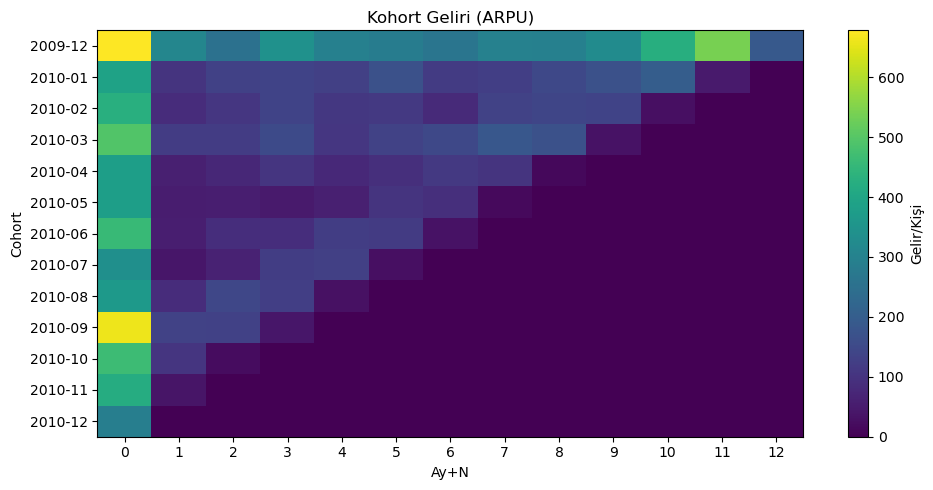

In [31]:
rev = con.execute(q_base + """
SELECT cohort_month, month_index, SUM(amount) AS revenue
FROM labeled GROUP BY 1,2 ORDER BY 1,2
""").df()
rev = rev.merge(cohort_sizes, on="cohort_month", how="left")
rev["arpu"] = rev["revenue"]/rev["cohort_size"]
mat_arpu = rev[rev["month_index"].between(0,12)]\
    .pivot(index="cohort_month", columns="month_index", values="arpu").fillna(0)
plt.figure(figsize=(10,5)); plt.imshow(mat_arpu, aspect="auto"); plt.colorbar(label="Gelir/Kişi")
plt.title("Kohort Geliri (ARPU)"); plt.xlabel("Ay+N"); plt.ylabel("Cohort")
plt.xticks(range(mat_arpu.shape[1]), mat_arpu.columns)
plt.yticks(range(mat_arpu.shape[0]), pd.to_datetime(mat_arpu.index).strftime("%Y-%m"))
plt.tight_layout(); plt.show()
